In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

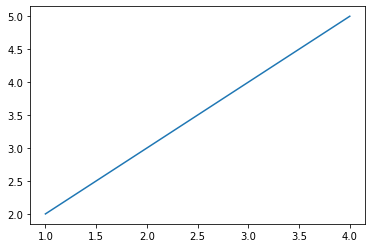

In [2]:
plt.style.use('default')
plt.plot([1,2,3,4],[2,3,4,5]);

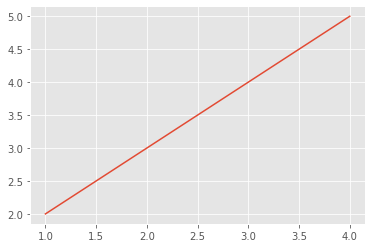

In [3]:
plt.style.use('ggplot')
plt.plot([1,2,3,4],[2,3,4,5]);

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


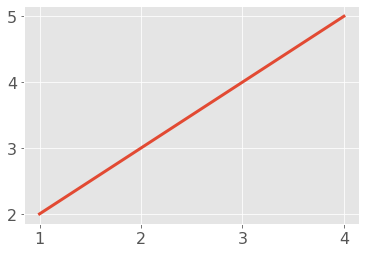

In [5]:
plt.style.use('./freestyle.mplstyle')
plt.plot([1,2,3,4],[2,3,4,5]);

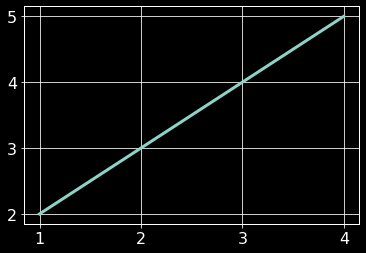

In [6]:
plt.style.use(['dark_background', './freestyle.mplstyle'])
plt.plot([1,2,3,4],[2,3,4,5]);

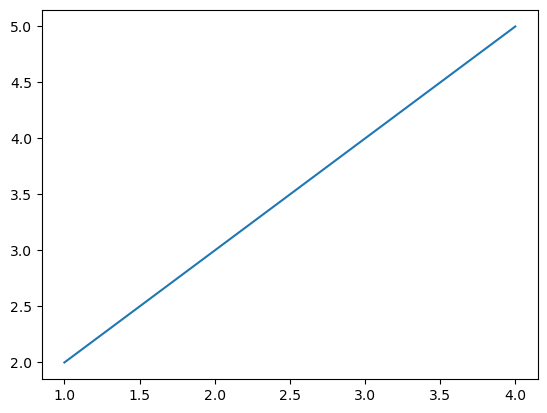

In [7]:
plt.style.use('default') # 恢复到默认样式
plt.plot([1,2,3,4],[2,3,4,5]);

我们还可以通过修改默认rc设置的方式改变样式，所有rc设置都保存在一个叫做 matplotlib.rcParams的变量中。

修改过后再绘图，可以看到绘图样式发生了变化。

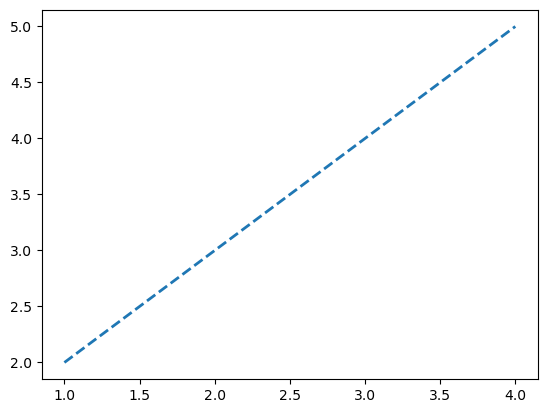

In [8]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot([1,2,3,4],[2,3,4,5]);

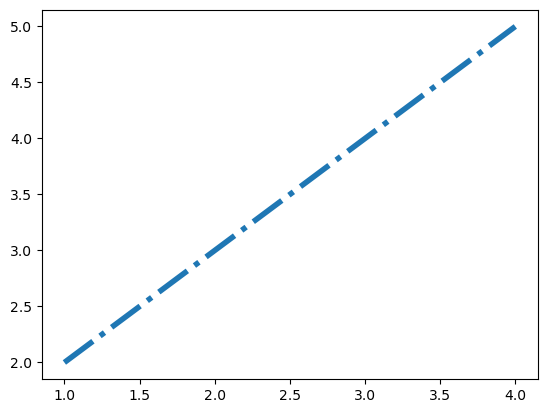

In [9]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot([1,2,3,4],[2,3,4,5]);

In [10]:
plt.style.use('default')

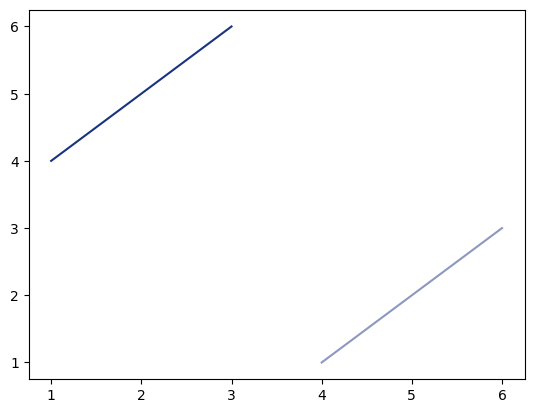

In [11]:
# 颜色用[0,1]之间的浮点数表示，四个分量按顺序分别为(red, green, blue, alpha)，其中alpha透明度可省略
plt.plot([1,2,3],[4,5,6],color=(0.1, 0.2, 0.5))
plt.plot([4,5,6],[1,2,3],color=(0.1, 0.2, 0.5, 0.5));

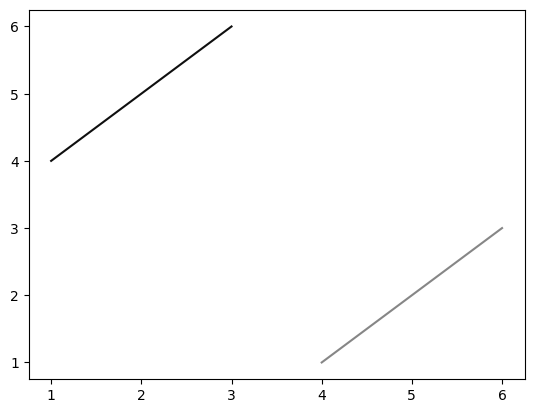

In [12]:
# 用十六进制颜色码表示，同样最后两位表示透明度，可省略
plt.plot([1,2,3],[4,5,6],color='#0f0f0f')
plt.plot([4,5,6],[1,2,3],color='#0f0f0f80');

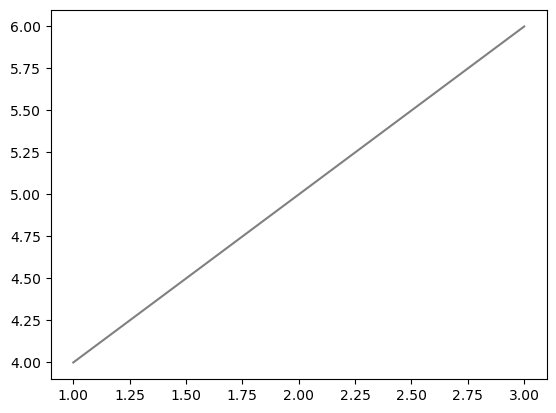

In [13]:
# 当只有一个位于[0,1]的值时，表示灰度色阶
plt.plot([1,2,3],[4,5,6],color='0.5');

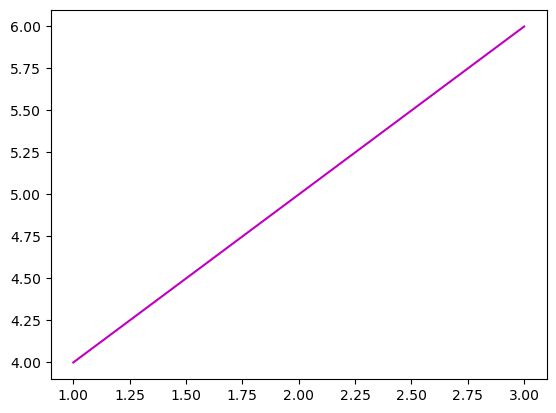

In [14]:
# matplotlib有八个基本颜色，可以用单字符串来表示，分别是'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'，对应的是blue, green, red, cyan, magenta, yellow, black, and white的英文缩写
plt.plot([1,2,3],[4,5,6],color='m');

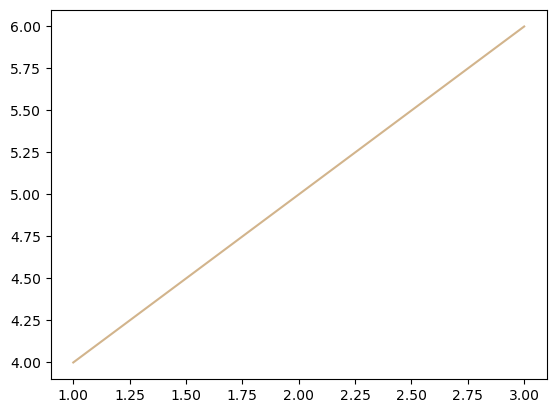

In [15]:
# matplotlib提供了颜色对照表，可供查询颜色对应的名称
plt.plot([1,2,3],[4,5,6],color='tan');

![](https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_002.png)
![](https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png)

### 6.使用colormap设置一组颜色

有些图表支持使用colormap的方式配置一组颜色，从而在可视化中通过色彩的变化表达更多信息。

在matplotlib中，colormap共有五种类型:

- 顺序（Sequential）。通常使用单一色调，逐渐改变亮度和颜色渐渐增加，用于表示有顺序的信息
- 发散（Diverging）。改变两种不同颜色的亮度和饱和度，这些颜色在中间以不饱和的颜色相遇;当绘制的信息具有关键中间值（例如地形）或数据偏离零时，应使用此值。
- 循环（Cyclic）。改变两种不同颜色的亮度，在中间和开始/结束时以不饱和的颜色相遇。用于在端点处环绕的值，例如相角，风向或一天中的时间。
- 定性（Qualitative）。常是杂色，用来表示没有排序或关系的信息。
- 杂色（Miscellaneous）。一些在特定场景使用的杂色组合，如彩虹，海洋，地形等。



在以下官网页面可以查询上述五种colormap的字符串表示和颜色图的对应关系    
[https://matplotlib.org/stable/tutorials/colors/colormaps.html](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

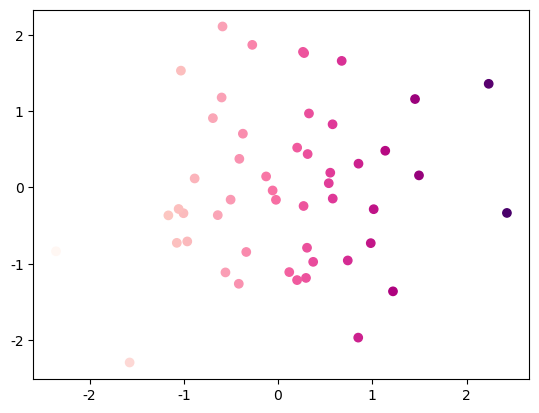

In [16]:
x = np.random.randn(50)
y = np.random.randn(50)
plt.scatter(x,y,c=x,cmap='RdPu');

from matplotlib.colors import ListedColormap## 思考题
- 学习如何自定义colormap，并将其应用到任意一个数据集中，绘制一幅图像，注意colormap的类型要和数据集的特性相匹配，并做简单解释

In [17]:
from matplotlib.colors import ListedColormap

In [18]:
data_raw = pd.read_csv('./data/diamonds.csv')

def cut_to_int(df):
    if df['cut'] == 'Ideal':
        return 1
    elif df['cut'] == 'Premium':
        return 2
    elif df['cut'] == 'Very Good':
        return 3
    elif df['cut'] == 'Good':
        return 4
    else:
        return 5
    

data_raw.loc[:, 'cut_v'] = data_raw.apply(cut_to_int, axis=1)

In [19]:
data_raw['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [20]:
data_raw.loc[data_raw['cut'] == 'Ideal'].head()

,carat,cut,clarity,price,cut_v
0,0.23,Ideal,SI2,326,1
11,0.23,Ideal,VS1,340,1
13,0.31,Ideal,SI2,344,1
16,0.30,Ideal,SI2,348,1
39,0.33,Ideal,SI2,403,1


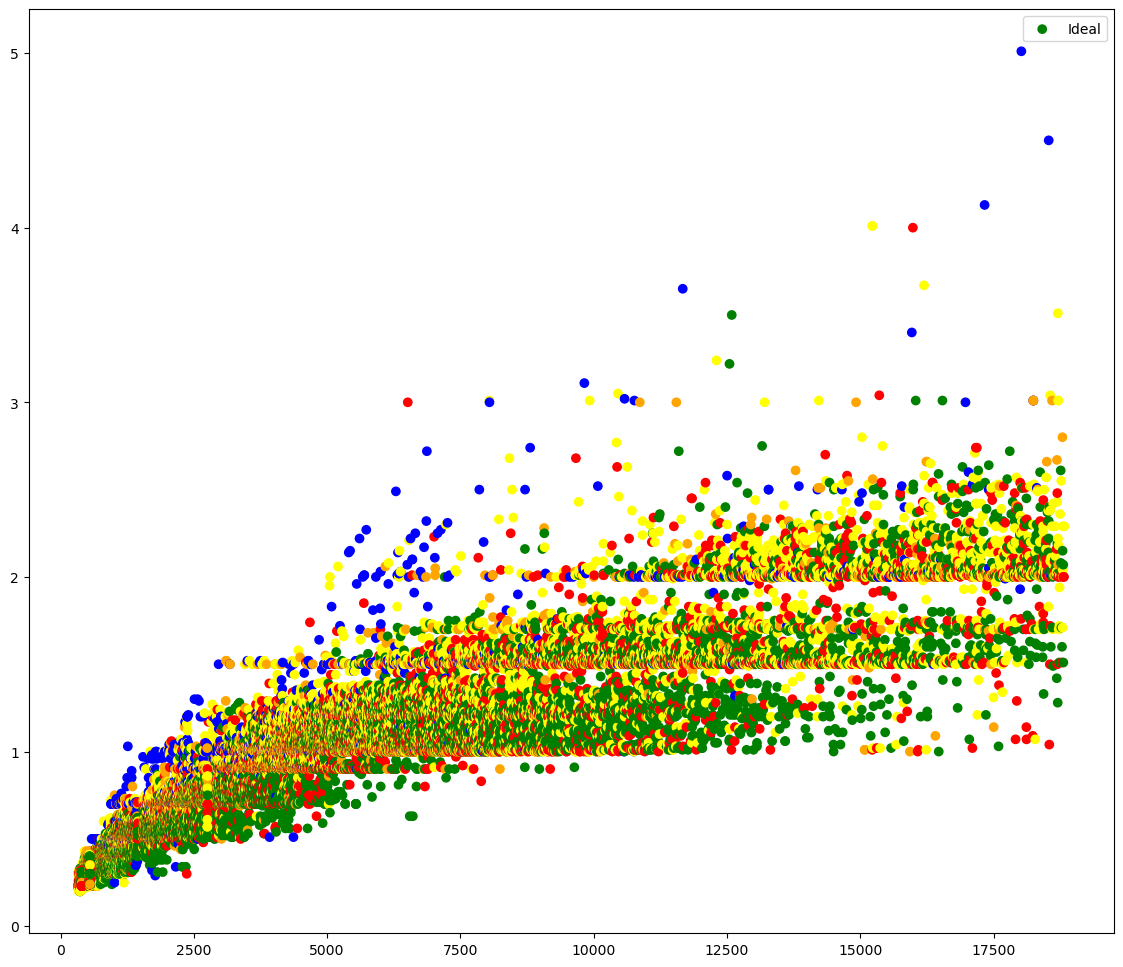

In [21]:
cmap = ListedColormap(["green", "yellow", "red", "orange", "blue"])# 不同的颜色代表不同的cut程度

cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

fig, ax = plt.subplots(figsize=(14, 12))
scatter = ax.scatter(data_raw['price'], data_raw['carat'], c=data_raw['cut_v'], cmap=cmap)
ax.legend(*scatter.legend_elements(),loc='best',labels=cut)
plt.show()

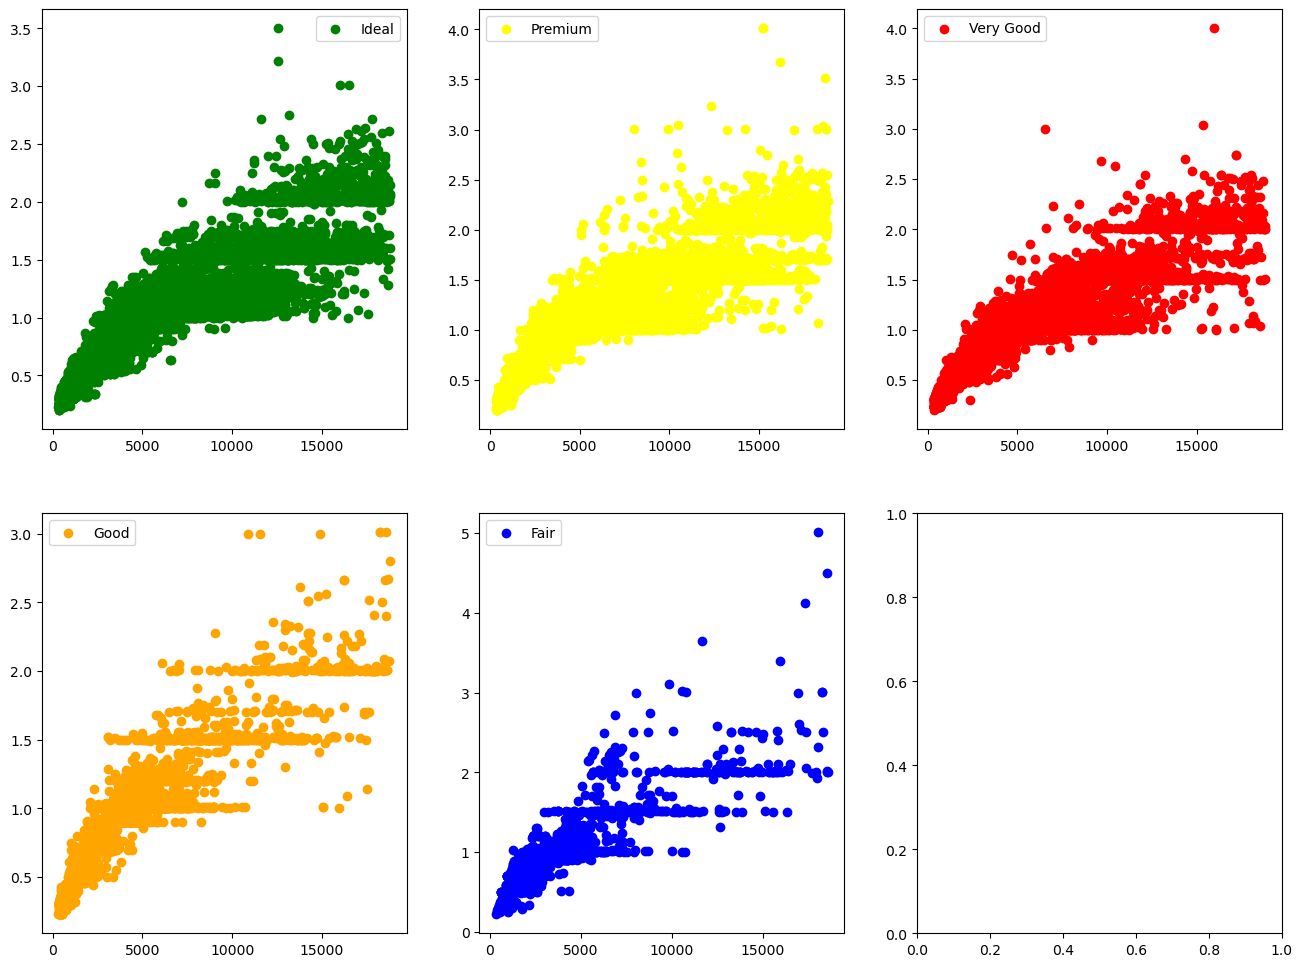

In [22]:
cmap = ["green", "yellow", "red", "orange", "blue"]# 不同的颜色代表不同的cut程度

cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

fig, axs = plt.subplots(2,3,figsize=(16, 12))
for i,d in enumerate(cut):
    axs[i//3][i%3].scatter(data_raw.loc[data_raw['cut'] == d]['price'], data_raw.loc[data_raw['cut'] == d]['carat'], label=cut[i], c=cmap[i])
    axs[i//3][i%3].legend(loc='best')
plt.show()